<a href="https://colab.research.google.com/github/meghannnnnnn/SCT_DS_02/blob/main/SCT_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
path="/content/drive/MyDrive/titanic/train.csv"
train_df=pd.read_csv(path)

# **SUMMARY STATISTICS**



In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **DATA CLEANING**
#### Handling Missing values

In [ ]:
print(train_df.notnull().sum())

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


In [ ]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### Drop rows with too many missing values

#### Keep rows with at least 3 non-missing values


In [ ]:
train_df.dropna(thresh=train_df.shape[1] - 3, inplace=True)

### Impute missing values with mean

In [ ]:
train_df.fillna({'Age': train_df['Age'].mean()}, inplace=True)

In [ ]:
# Convert to numeric or categorical
train_df['Embarked'] = pd.factorize(train_df['Embarked'])[0]  # Convert to numeric

# Interpolate
train_df['Embarked'] = train_df['Embarked'].interpolate(method='linear')

In [ ]:
# Create a new feature for family size
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

In [ ]:
train_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


In [ ]:
train_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.00,257.35,1.00,223.50,446.00,668.5,891.00
Survived,891.0,0.38,0.49,0.00,0.00,0.00,1.0,1.00
Pclass,891.0,2.31,0.84,1.00,2.00,3.00,3.0,3.00
Age,891.0,29.70,13.00,0.42,22.00,29.70,35.0,80.00
SibSp,891.0,0.52,1.10,0.00,0.00,0.00,1.0,8.00
Parch,891.0,0.38,0.81,0.00,0.00,0.00,0.0,6.00
Fare,891.0,32.20,49.69,0.00,7.91,14.45,31.0,512.33
Embarked,891.0,0.36,0.64,-1.00,0.00,0.00,1.0,2.00
FamilySize,891.0,1.90,1.61,1.00,1.00,1.00,2.0,11.00


In [ ]:
print(train_df['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


In [ ]:
print(train_df['Pclass'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [ ]:
print(train_df['Embarked'].value_counts())

Embarked
 0    644
 1    168
 2     77
-1      2
Name: count, dtype: int64


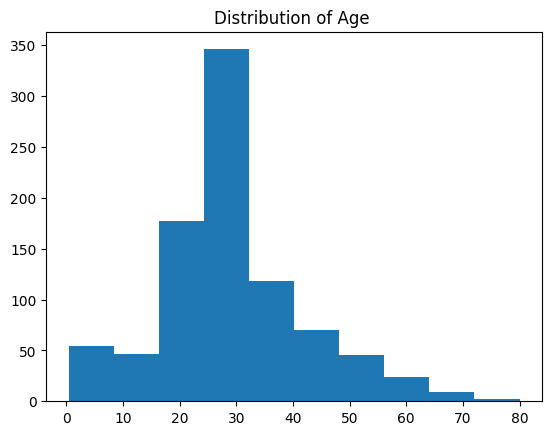

In [ ]:
plt.hist(train_df['Age'].dropna())
plt.title('Distribution of Age ')
plt.show()

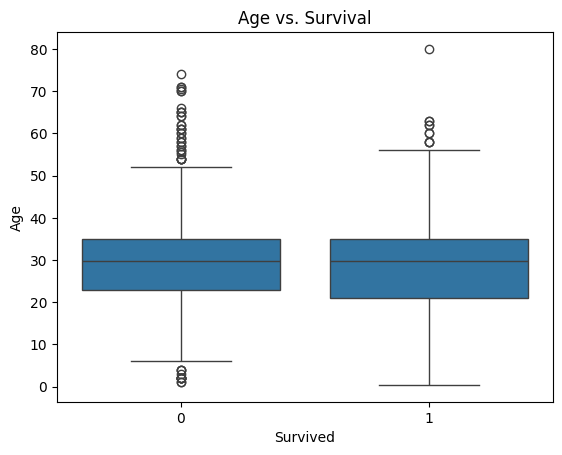

In [ ]:
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title('Age vs. Survival')
plt.show()


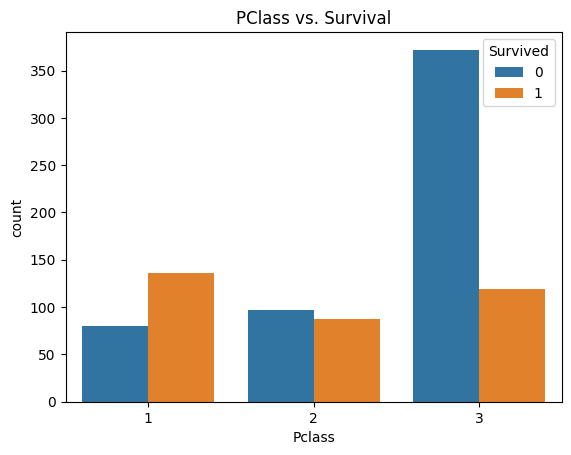

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('PClass vs. Survival')
plt.show()

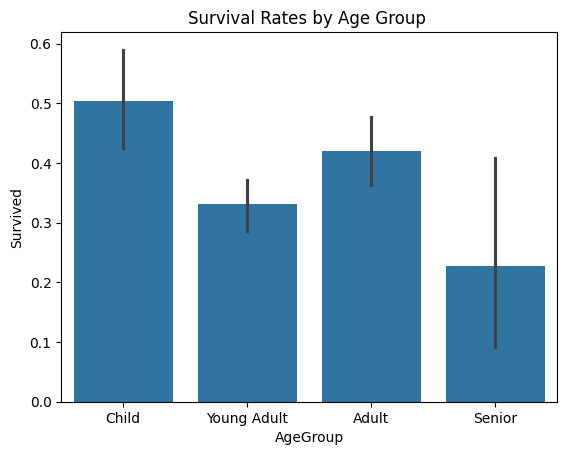

In [ ]:
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=[0, 18, 30, 60, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
sns.barplot(x='AgeGroup', y='Survived', data=train_df)  # Replace data with train_df
plt.title('Survival Rates by Age Group ')
plt.show()

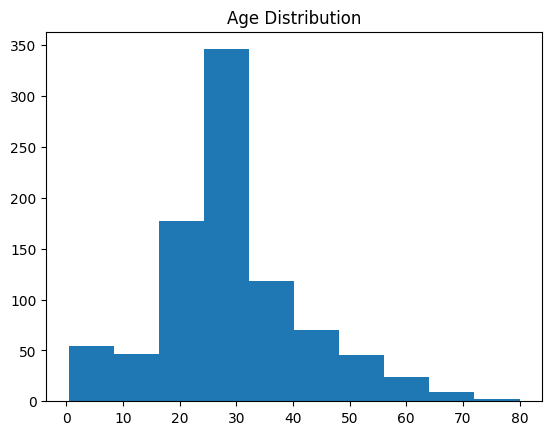

In [ ]:
plt.hist(train_df['Age'].dropna())
plt.title('Age Distribution')
plt.show()


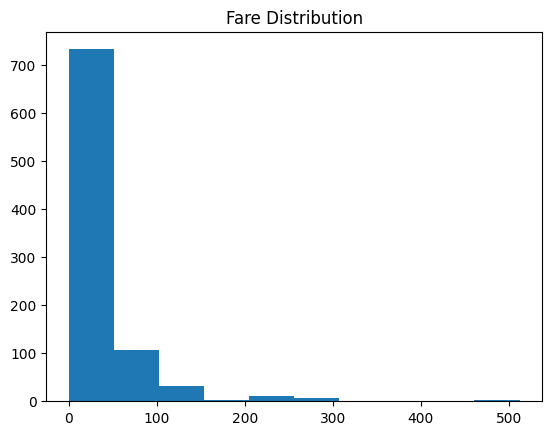

In [ ]:
plt.hist(train_df['Fare'].dropna())
plt.title('Fare Distribution')
plt.show()

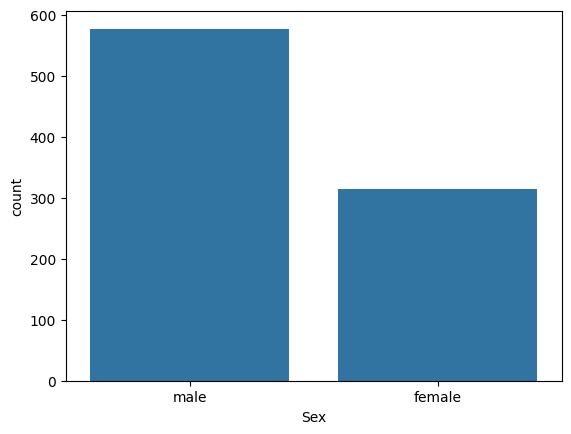

In [ ]:
sns.countplot(x='Sex', data=train_df)
plt.show()

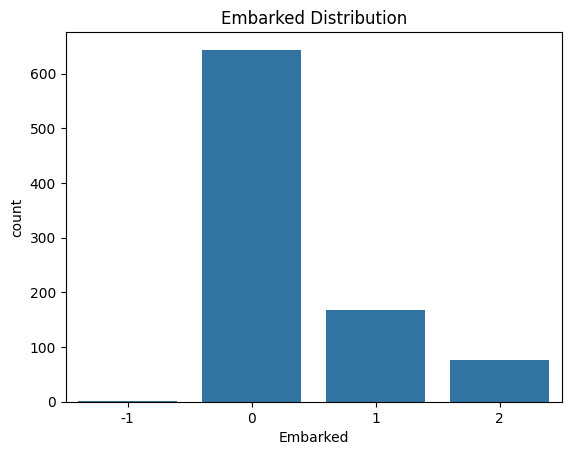

In [ ]:
sns.countplot(x='Embarked', data=train_df)  # Replace data with train_df
plt.title('Embarked Distribution')
plt.show()